In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
import theano
import theano.tensor as tt

In [2]:
@theano.compile.ops.as_op(itypes=[tt.lscalar], otypes=[tt.lscalar])
def meth(guess: int) ->int:
    password = 512
    return np.int64(guess == password) 

In [60]:
def binary_search_prpro(lower, higher):
    middle = ((higher-lower)//2)+lower
    with pm.Model() as model:
        left_alice = pm.distributions.DiscreteUniform("Left", lower, middle)
        right_alice = pm.distributions.DiscreteUniform("Right", middle, higher)
        left_output = pm.Deterministic("output_l", meth(left_alice))
        right_output = pm.Deterministic("output_r", meth(right_alice))

        trace = pm.sample(cores=1,progressbar=False)
        
        

        left_I = mutual_info_regression([[a] for a in trace["Left"]], trace["output_l"], discrete_features=True)[0]
        right_I = mutual_info_regression([[a] for a in trace["Right"]], trace["output_r"], discrete_features=True)[0]
        print(left_I)
        print(right_I)
        if left_I > right_I:
            return (lower, middle, left_I)
        elif right_I < left_I:
            return (middle,higher, right_I)
        else:
            return (middle,higher, right_I)

In [24]:
binary_search_prpro(0,2000)

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [Right]
>Metropolis: [Left]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


0.019905282260313406
0.012507718369280774


(0, 1000)

In [25]:
binary_search_prpro(1000,2000)

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [Right]
>Metropolis: [Left]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


0.0025382667452404917
0


(1000, 1500)

In [26]:
binary_search_prpro(1000,1500)

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [Right]
>Metropolis: [Left]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


0.03280826160363226
0.01239938003143859


(1000, 1250)

In [27]:
binary_search_prpro(1000,1250)

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [Right]
>Metropolis: [Left]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


0.03748944718819214
0.028193435026512503


(1000, 1125)

In [28]:
binary_search_prpro(1000,1125)

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [Right]
>Metropolis: [Left]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


0.03158563697826633
4.277269624175517e-05


(1000, 1062)

In [29]:
binary_search_prpro(1000,1062)

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [Right]
>Metropolis: [Left]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


0.10552374138191123
0.010787786568812407


(1000, 1031)

In [30]:
binary_search_prpro(1000,1031)

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [Right]
>Metropolis: [Left]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


0.14632077125783605
0


(1000, 1015)

In [32]:
binary_search_prpro(1000,1031)

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [Right]
>Metropolis: [Left]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


0.2878059122129466
0.014250929271006463


(1000, 1015)

In [33]:
binary_search_prpro(1000,1015)

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [Right]
>Metropolis: [Left]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


0.36337261686277644
0.00559037231752324


(1000, 1007)

In [34]:
binary_search_prpro(1000,1007)

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [Right]
>Metropolis: [Left]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


0.5340858492448055
0


(1000, 1003)

In [35]:
binary_search_prpro(1000,1003)

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [Right]
>Metropolis: [Left]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


0.6930326988210608
0.006637429262585037


(1000, 1001)

In [36]:
binary_search_prpro(1000,1001)

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [Right]
>Metropolis: [Left]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.


0.0002499999999987512
0.6936427430539365


/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/xarray/core/nputils.py:227: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


(1000, 1001)

In [ ]:
l,h = 0, 2000
while((l+h)//2 > 20):
    print(l,h)
    l,h = binary_search_prpro(l,h)
print(l,h)

The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


0.04255493400185184
0
0 1000 0.04255493400185184


The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


0
0.014961393731071304
500 1000 0.014961393731071304


The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


0.0016220288108002023
0.00048384284565727853
500 750 0.0016220288108002023


The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


0
0.023242268689737777
625 750 0.023242268689737777


The estimated number of effective samples is smaller than 200 for some parameters.


0
0.004703078793699689
687 750 0.004703078793699689


The estimated number of effective samples is smaller than 200 for some parameters.


0
0
718 750 0


The estimated number of effective samples is smaller than 200 for some parameters.


0.004474981859090121
0.050899804204944665
734 750 0.050899804204944665


The estimated number of effective samples is smaller than 200 for some parameters.


0.006387349241490536
0.010644895438133961
742 750 0.010644895438133961
0.0185496886271439
0
742 746 0.0185496886271439
0.019187305882035766
0.002781545160695398
742 744 0.019187305882035766


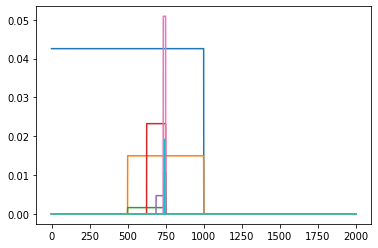

In [61]:
def uniform_plot(l,h,v, max_h, max_l):
    x = np.hstack((np.linspace(0,0,l-max_l),np.linspace(v,v,h-l),np.linspace(0,0,max_h-h)))
    plt.plot(x)
l,h = (0,2000)
for i in range(10):
    l,h,v = binary_search_prpro(l,h)
    print(l,h,v)
    uniform_plot(l,h,v,2000,0)

The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


0.016943867702671866
0.005561173624811566
1000 1250 0.016943867702671866


The estimated number of effective samples is smaller than 200 for some parameters.


0.019695277457215
0.0017576988440035635
1000 1125 0.019695277457215


The estimated number of effective samples is smaller than 200 for some parameters.


0.028993050310146984
0.004358555458811253
1000 1062 0.028993050310146984


The estimated number of effective samples is smaller than 200 for some parameters.


0.11762630734312562
0.003959610128093871
1000 1031 0.11762630734312562


The estimated number of effective samples is smaller than 200 for some parameters.


0.14460379137886514
0
1000 1015 0.14460379137886514


The estimated number of effective samples is smaller than 200 for some parameters.


0.3988991340544703
0.03565176170560491
1000 1007 0.3988991340544703
0.6039673576582749
0
1000 1003 0.6039673576582749
0.6945972422349048
0.007594781513283522
1000 1001 0.6945972422349048


/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/xarray/core/nputils.py:227: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


0.0007499999999986962
0.6933927430539356
1000 1001 0.6933927430539356
0.0007499999999986962
0.6930691317435242
1000 1001 0.6930691317435242


/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/xarray/core/nputils.py:227: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


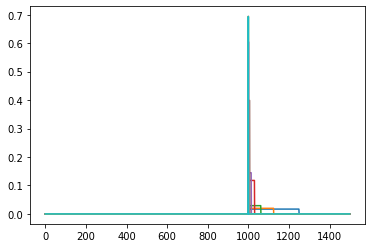

In [62]:
l,h = (1000,1500)
import logging
logger = logging.getLogger("pymc3")
logger.propagate = False
logger.setLevel(logging.ERROR)
for i in range(10):
    l,h,v = binary_search_prpro(l,h)
    print(l,h,v)
    uniform_plot(l,h,v,1500,0)

In [18]:
# Linear search with bin size
def linear_search(li,hi, bin_width=50):
    ranges = [(i,i+bin_width) for i in range(li,hi,bin_width)]
    x = np.linspace(0,0,10)
    with pm.Model() as model:
        i = 1
        for l,h in ranges:
            alice = pm.distributions.DiscreteUniform(f"Uniform_{l}_{h}", l,h)
            pm.Deterministic(f"Output{l}{h}", meth(alice))
            print("\r " + str(i) + "/" + str(len(ranges)), end="\r")
            i+=1
        trace = pm.sample(5000,cores=1, tune=5000)
        for l,h in ranges:
            I = mutual_info_regression([[a] for a in trace[f"Uniform_{l}_{h}"]], trace[f"Output{l}{h}"], discrete_features=True)[0]
            x_i = np.linspace(I,I, bin_width)
            x = np.hstack((x,x_i))
    print(len(x))
    plt.plot(np.linspace(li-10,hi, hi-li+10), x)

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [Uniform_550_600]
>Metropolis: [Uniform_500_550]
>Metropolis: [Uniform_450_500]
>Metropolis: [Uniform_400_450]


Sampling 2 chains for 5_000 tune and 5_000 draw iterations (10_000 + 10_000 draws total) took 9 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


210


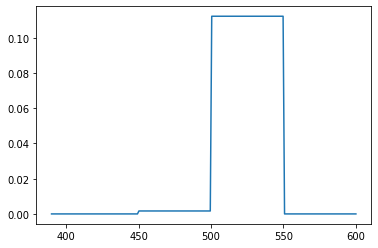

In [19]:
linear_search(400,600,50)

The estimated number of effective samples is smaller than 200 for some parameters.


1210


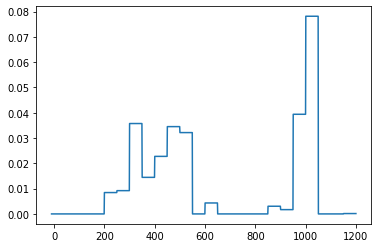

In [78]:
linear_search(0,1200,50)

INFO (theano.gof.compilelock): Refreshing lock /Users/maoj/.theano/compiledir_Darwin-19.6.0-x86_64-i386-64bit-i386-3.7.7-64/lock_dir/lock


30


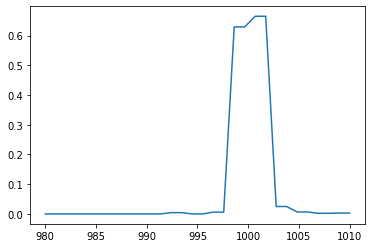

In [79]:
linear_search(990,1010,2)

INFO (theano.gof.compilelock): Refreshing lock /Users/maoj/.theano/compiledir_Darwin-19.6.0-x86_64-i386-64bit-i386-3.7.7-64/lock_dir/lock


13


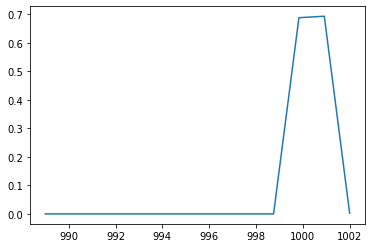

In [82]:
linear_search(999,1002,1)

INFO (theano.gof.compilelock): Refreshing lock /Users/maoj/.theano/compiledir_Darwin-19.6.0-x86_64-i386-64bit-i386-3.7.7-64/lock_dir/lock


The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.


1000010


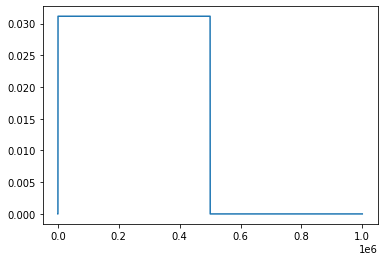

In [83]:
linear_search(0,1_000_000,500_000)

The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.


500010


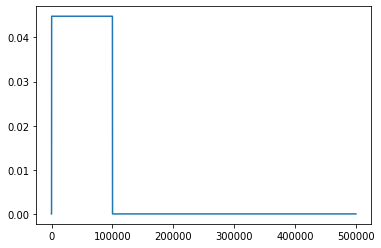

In [84]:
linear_search(0,500_000,100_000)

The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


100010


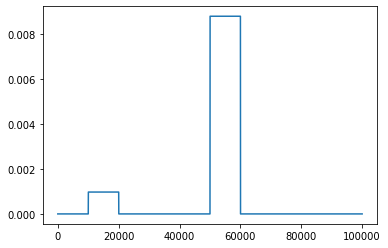

In [88]:
linear_search(0,100_000,10_000)

INFO (theano.gof.compilelock): Refreshing lock /Users/maoj/.theano/compiledir_Darwin-19.6.0-x86_64-i386-64bit-i386-3.7.7-64/lock_dir/lock


The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


4010
9.757704973220825


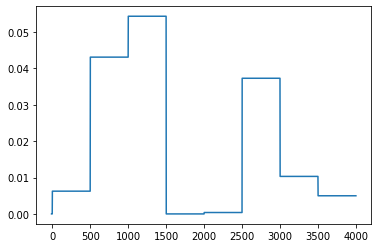

In [91]:
import time
start = time.time()
linear_search(0,4000,500)
end = time.time()
print(end-start)

The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


1010


The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.


1010


The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


1010


The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


1010
6.9990410804748535


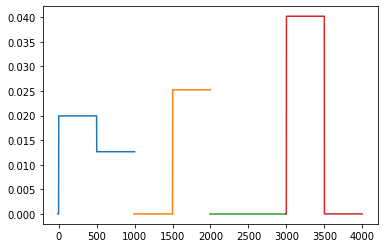

In [92]:
import time
start = time.time()
for i in range(4):
    linear_search(i*1000,(i+1)*1000,500)
end = time.time()
print(end-start)

# Shanon leakage QIF 7.24
--- name --- | ---name---
0.5 - 0.51
0.5 - 0.48
0.5 - 0.43

$ log_2 3 * (1 - \sum_y min_x C_{x,y}) = 1.58*(1-(0.5+0.48+0.43) = -0.647$

In [106]:
X = [[0.5,0.39,0.11],[0.5,0.4,0.1],[0.5,0.41,0.09]]
y = [np.prod(x) for x in X]

0.059899999999999995

In [94]:
[[0.5][0.5][0.5]]

TypeError: list indices must be integers or slices, not float

In [107]:
f = lambda x: x+10

In [108]:
f(10)

20

In [109]:
l = [1,2,3,4,5]

In [112]:
list(map(f,l))

[11, 12, 13, 14, 15]